In [ ]:
import pickle

with open("data/wp_rx.pkl", "rb") as f:
    rx = pickle.load(f)

print(f"Total entries: {len(rx)}")
print(f"Unique keys: {len(set(rx.keys()))}")


Total entries: 33030
Unique keys: 33030


In [2]:
rx[(2, 5, (2, 0, 0, 0, 0))]

Fraction(1166763, 128)

In [3]:
for k, v in list(rx.items())[:10]:
    print(k, v)


(0, 3, (0, 0, 0)) 1
(0, 4, (0, 0, 0, 0)) 1
(0, 4, (1, 0, 0, 0)) 12
(1, 1, (0,)) 1/24
(1, 1, (1,)) 1/2
(0, 5, (0, 0, 0, 0, 0)) 5/2
(0, 5, (1, 0, 0, 0, 0)) 36
(0, 5, (1, 1, 0, 0, 0)) 288
(0, 5, (2, 0, 0, 0, 0)) 240
(1, 2, (0, 0)) 1/16


In [4]:
bad_keys = [k for k in rx if not isinstance(k, tuple) or len(k) != 3 or not isinstance(k[2], tuple)]
if bad_keys:
    print(f"Found {len(bad_keys)} malformed keys")


In [5]:
from fractions import Fraction
non_fraction = [v for v in rx.values() if not isinstance(v, Fraction)]
print(f"Non-fraction values: {len(non_fraction)}")


Non-fraction values: 0


In [4]:
from wp.compute import iterate, alpha_bs
from wp.normalization import x_from_rx
from wp.genus0 import genus0_x

rx = iterate(dmax=10, cache_path="data/wp_rx.pkl", max_workers=1)

for n in range(3, 10):
    g = 0
    D = 3*g - 3 + n
    allalpha = alpha_bs(n, D)
    print(f"Testing g=0, n={n}, D={D} on {len(allalpha)} α’s")
    for alpha in allalpha:
        alpha_can = tuple(sorted(alpha, reverse=True))
        key = (g, n, alpha_can)
        assert key in rx, f"Missing key: {key}"
        x_rec = x_from_rx(g, n, alpha_can, rx[key])
        x_exact = genus0_x(n, alpha_can)
        if x_rec != x_exact:
            print(f"❌ Mismatch for α={alpha_can}: rec={x_rec}, exact={x_exact}")
        else:
            print(f"✅ Match for α={alpha_can}: {x_rec}")


23:04:03 | INFO | wp.compute | Computing (g=0, n=4): 2 α’s (mode=missing, workers=seq)
23:04:03 | INFO | wp.compute | ✅ Final checkpoint saved for (g=0, n=4)
23:04:03 | INFO | wp.compute | Computing (g=0, n=5): 4 α’s (mode=missing, workers=seq)
23:04:03 | INFO | wp.compute | ✅ Final checkpoint saved for (g=0, n=5)
23:04:03 | INFO | wp.compute | Computing (g=1, n=2): 4 α’s (mode=missing, workers=seq)
23:04:03 | INFO | wp.compute | ✅ Final checkpoint saved for (g=1, n=2)
23:04:03 | INFO | wp.compute | Computing (g=0, n=6): 7 α’s (mode=missing, workers=seq)
23:04:03 | INFO | wp.compute | ✅ Final checkpoint saved for (g=0, n=6)
23:04:03 | INFO | wp.compute | Computing (g=1, n=3): 7 α’s (mode=missing, workers=seq)
23:04:03 | INFO | wp.compute | ✅ Final checkpoint saved for (g=1, n=3)
23:04:03 | INFO | wp.compute | Computing (g=0, n=7): 12 α’s (mode=missing, workers=seq)
23:04:03 | INFO | wp.compute | ✅ Final checkpoint saved for (g=0, n=7)
23:04:03 | INFO | wp.compute | Computing (g=1, n=4)

In [17]:
from wp.recursion import A_k
from fractions import Fraction
assert A_k(0) == Fraction(4,1)
assert A_k(1) == Fraction(1,3)
assert A_k(2) == Fraction(7,360)

In [6]:
from wp.partitions import split_index_sets

split_index_sets(4)

[([], [0, 1, 2, 3]),
 ([0], [1, 2, 3]),
 ([1], [0, 2, 3]),
 ([2], [0, 1, 3]),
 ([3], [0, 1, 2]),
 ([0, 1], [2, 3]),
 ([0, 2], [1, 3]),
 ([0, 3], [1, 2])]

In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
from wp.recursion import rx_rec_opt_symbolic

def rx_lookup(g, n, alpha):
    return f"RX[{g},{n},{alpha}]"

expr = rx_rec_opt_symbolic(2, 5, (0, 0, 0, 0, 0))
print(expr)

7*X[0,3,(0, 0, 0)]*X[2,3,(0, 0, 0)]/15 + 31*X[0,3,(0, 0, 0)]*X[2,3,(1, 0, 0)]/1260 + 127*X[0,3,(0, 0, 0)]*X[2,3,(2, 0, 0)]/100800 + 73*X[0,3,(0, 0, 0)]*X[2,3,(3, 0, 0)]/1140480 + 1414477*X[0,3,(0, 0, 0)]*X[2,3,(4, 0, 0)]/435891456000 + 8191*X[0,3,(0, 0, 0)]*X[2,3,(5, 0, 0)]/49816166400 + 16931177*X[0,3,(0, 0, 0)]*X[2,3,(6, 0, 0)]/2032499589120000 + 14*X[0,4,(0, 0, 0, 0)]*X[2,2,(0, 0)]/45 + 31*X[0,4,(0, 0, 0, 0)]*X[2,2,(1, 0)]/1890 + 127*X[0,4,(0, 0, 0, 0)]*X[2,2,(2, 0)]/151200 + 73*X[0,4,(0, 0, 0, 0)]*X[2,2,(3, 0)]/1710720 + 1414477*X[0,4,(0, 0, 0, 0)]*X[2,2,(4, 0)]/653837184000 + 8191*X[0,4,(0, 0, 0, 0)]*X[2,2,(5, 0)]/74724249600 + 31*X[0,4,(1, 0, 0, 0)]*X[2,2,(0, 0)]/1890 + 127*X[0,4,(1, 0, 0, 0)]*X[2,2,(1, 0)]/151200 + 73*X[0,4,(1, 0, 0, 0)]*X[2,2,(2, 0)]/1710720 + 1414477*X[0,4,(1, 0, 0, 0)]*X[2,2,(3, 0)]/653837184000 + 8191*X[0,4,(1, 0, 0, 0)]*X[2,2,(4, 0)]/74724249600 + 16931177*X[0,4,(1, 0, 0, 0)]*X[2,2,(5, 0)]/3048749383680000 + 7*X[0,5,(0, 0, 0, 0, 0)]*X[2,1,(0,)]/90 + 31*X[0,

In [8]:
from wp.dependency import DependencyGraph
G = DependencyGraph()
graph = G.build(g=3, n=1, alpha=(0,))

In [9]:
graph

defaultdict(set,
            {(3, 1, (0,)): {(2, 2, (0, 0)),
              (2, 2, (1, 0)),
              (2, 2, (1, 1)),
              (2, 2, (2, 0)),
              (2, 2, (2, 1)),
              (2, 2, (2, 2)),
              (2, 2, (3, 0)),
              (2, 2, (3, 1)),
              (2, 2, (3, 2)),
              (2, 2, (4, 0)),
              (2, 2, (4, 1)),
              (2, 2, (5, 0))},
             (2, 2, (0, 0)): {(1, 1, (0,)),
              (1, 1, (1,)),
              (1, 2, (0, 0)),
              (1, 2, (1, 0)),
              (1, 2, (2, 0)),
              (1, 3, (0, 0, 0)),
              (1, 3, (1, 0, 0)),
              (1, 3, (1, 1, 0)),
              (1, 3, (2, 0, 0)),
              (1, 3, (2, 1, 0)),
              (1, 3, (3, 0, 0)),
              (2, 1, (0,)),
              (2, 1, (1,)),
              (2, 1, (2,)),
              (2, 1, (3,)),
              (2, 1, (4,))},
             (2, 1, (0,)): {(1, 2, (0, 0)),
              (1, 2, (1, 0)),
              (1, 2, (1, 1)),
   

In [10]:
from graphviz import Digraph

def format_node(key) -> str:
    g, n, alpha = key
    return f"({g}, {n}, {alpha})"

def graph_to_digraph(graph) -> Digraph:
    dot = Digraph()
    for src, dsts in graph.items():
        src_label = format_node(src)
        for dst in dsts:
            dst_label = format_node(dst)
            dot.edge(src_label, dst_label)
    return dot


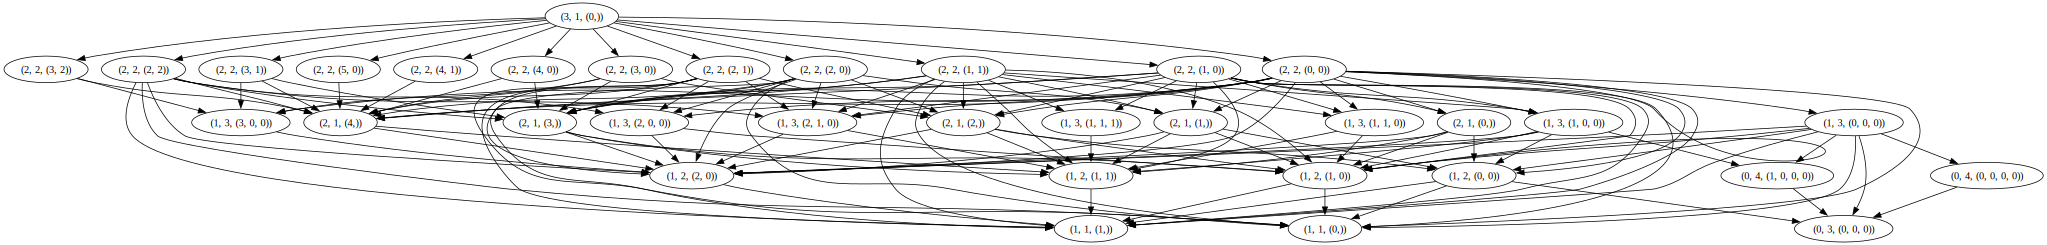

In [11]:
dot = graph_to_digraph(graph)
dot  # Jupyter will render this directly
